In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from statistics import median
from statistics import mean
import cv2

# First Image:

In [2]:
loc = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P3/I/covid-19_1.jpg'
im = Image.open(loc)
img = np.array(im)

In [10]:
def pix_med_filter(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = median(neigh_pixs)
    return out_pixel
def median_filter(image,filter_size):
    filtered_image = np.zeros(list(image.shape))
    x,y = image.shape
#     count = 0
    for i in range(x):
        for j in range(y):
            filtered_image[i,j] = pix_med_filter([i,j], image, filter_size)
    fil_size = filter_size
    return(filtered_image, fil_size)

In [9]:
def pix_max_filter(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = max(neigh_pixs)
    return out_pixel
def max_filter(image,filter_size):
    filtered_image = np.zeros(list(image.shape))
    x,y = image.shape
#     count = 0
    for i in range(x):
        for j in range(y):
            filtered_image[i,j] = pix_med_filter([i,j], image, filter_size)
    fil_size = filter_size
    return(filtered_image, fil_size)

In [11]:
def pix_mean_filter(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = mean(neigh_pixs)
    return out_pixel
def mean_filter(image,filter_size):
    filtered_image = np.zeros(list(image.shape))
    x,y = image.shape
#     count = 0
    for i in range(x):
        for j in range(y):
            filtered_image[i,j] = pix_med_filter([i,j], image, filter_size)
    fil_size = filter_size
    return(filtered_image, fil_size)

In [12]:
output_image, fs = median_filter(img,7)

C:\Users\sherw\Anaconda3\lib\statistics.py:384: RuntimeWarning: overflow encountered in ubyte_scalars
  return (data[i - 1] + data[i])/2


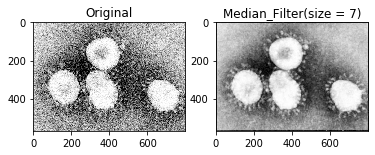

In [13]:
plt.subplot(1,2,1)
plt.imshow(im,'gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(output_image, 'gray')
plt.title('Median_Filter(size = {})'.format(fs))
plt.show()

# Second Image:

In [14]:
loc = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P3/I/covid-19_2.jpg'
im = Image.open(loc)
img = np.array(im)

In [15]:
img2 = cv2.imread(loc,0) 

In [16]:
print(img)

[[108 104  99 ...  71  71  70]
 [106 101  96 ...  71  71  71]
 [105  99  95 ...  73  73  74]
 ...
 [ 71  71  72 ...  54  54  55]
 [ 72  72  72 ...  52  52  53]
 [ 70  71  72 ...  51  51  52]]


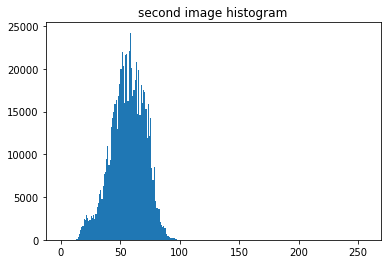

In [17]:
plt.hist(img.ravel(),256,[0,256])
plt.title('second image histogram')
plt.show()

In [18]:
#row, col = img.shape
def df(img):  # to make a histogram (count distribution frequency)
    values = [0]*256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            values[img[i,j]]+=1
    return values


def cdf(hist):  # cumulative distribution frequency
    cdf = [0] * len(hist)   #len(hist) is 256
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i]= cdf[i-1]+hist[i]
    # Now we normalize the histogram
    cdf = [ele*255/cdf[-1] for ele in cdf]  
    return cdf

def equalize_image(image):
    img = image
    my_cdf = cdf(df(img))
    # use linear interpolation of cdf to find new pixel values
    import numpy as np
    image_equalized = np.interp(image, range(0,256), my_cdf)
    return image_equalized

eq = equalize_image(img)

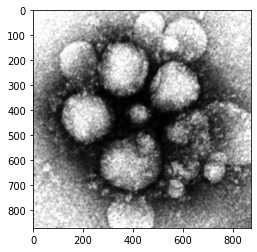

In [19]:
plt.imshow(eq,'gray')
plt.show()

In [20]:
#plt.imshow(eq,'gray')
eq2 = median_filter(eq,15)

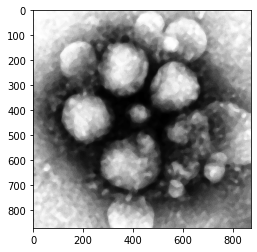

In [21]:
plt.imshow(eq2[0],'gray')


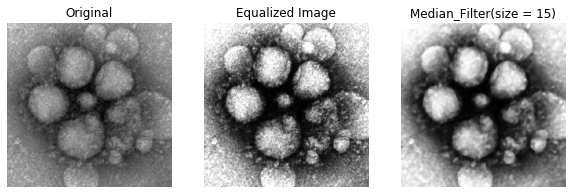

In [22]:
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,3,1)
plt.imshow(img2,'gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(eq, 'gray')
plt.title('Equalized Image')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(eq2[0], 'gray')
plt.title('Median_Filter(size = {})'.format(15))
plt.axis('off')
plt.show()

# Third Image:

In [23]:
loc = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P3/I/covid-19_3.jpg'
im = Image.open(loc)
img3 = np.array(im)

In [24]:
img3_r = img3[:,:,0]
img3_g = img3[:,:,1]
img3_b = img3[:,:,2]


In [25]:
un1,s = median_filter(img3_r,5)
un2,s = median_filter(img3_g,5)
un3,s = median_filter(img3_b,5)

In [26]:
rgb = np.dstack((un1,un2,un3))
rgb = np.array(rgb,dtype = int)

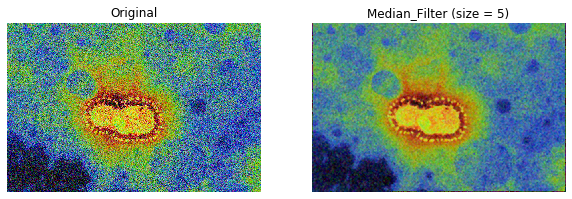

In [27]:
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(img3)
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(rgb, 'gray')
plt.title('Median_Filter (size = {})'.format(s))
plt.axis('off')
plt.show()

# Fourth Image:

In [28]:
loc = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P3/I/covid-19_4.jpg'
im = Image.open(loc)
img4 = np.array(im)

In [29]:
img4_r = img4[:,:,0]
img4_g = img4[:,:,1]
img4_b = img4[:,:,2]

In [30]:
un1,s = median_filter(img4_r,3)
un2,s = median_filter(img4_g,3)
un3,s = median_filter(img4_b,3)

In [31]:
rgb = np.dstack((un1,un2,un3))
rgb = np.array(rgb,dtype = int)

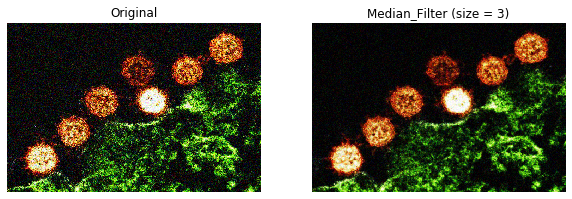

In [32]:
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(img4)
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(rgb, 'gray')
plt.title('Median_Filter (size = {})'.format(s))
plt.axis('off')
plt.show()